In [2]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [4]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [5]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [6]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
normalized_columns = df_market_data.select_dtypes(include=['float64', 'int64']).columns

In [7]:
scaler = StandardScaler()

In [8]:
df_market_data[normalized_columns] = scaler.fit_transform(df_market_data[normalized_columns])

In [9]:
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351


In [10]:
# Create a DataFrame with the scaled data
crypto_df_scaled = df_market_data.copy()

# Copy the crypto names from the original data
crypto_names = df_market_data.index
# Set the coinid column as index
if 'coin_id' in crypto_df_scaled.columns:
    crypto_df_scaled.set_index('coin_id', inplace=True)

# Display sample data
crypto_df_scaled.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351


---

### Find the Best Value for k Using the Original Data.

In [11]:
# Create a list with the number of k-values from 1 to 11
crypto_k_values = list(range(1,12))
print(crypto_k_values)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [12]:
# Create an empty list to store the inertia values
crytpo_inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
for k in crypto_k_values:
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans_model = KMeans(n_clusters=k, random_state=42)
# 2. Fit the model to the data using `df_market_data_scaled`
    kmeans_model.fit(crypto_df_scaled)
# 3. Append the model.inertia_ to the inertia list
    crytpo_inertia_values.append(kmeans_model.inertia_)
print(crytpo_inertia_values)

C:\Users\Jack.Hayes\.vscode\Anaconda\envs\ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Jack.Hayes\.vscode\Anaconda\envs\ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Jack.Hayes\.vscode\Anaconda\envs\ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Jack.Hayes\.vscode\Anaconda\envs\ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The 

[287.0, 195.82021818036043, 123.19048183836958, 79.02243535120975, 65.302379141625, 54.73992194210021, 43.48160605008147, 37.517032490103574, 32.59189097672458, 28.22289929060893, 24.116198421409198]


C:\Users\Jack.Hayes\.vscode\Anaconda\envs\ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Jack.Hayes\.vscode\Anaconda\envs\ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Jack.Hayes\.vscode\Anaconda\envs\ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Jack.Hayes\.vscode\Anaconda\envs\ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The 

In [13]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'crypto_k_values': crypto_k_values, 'crytpo_inertia_values': crytpo_inertia_values}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)
print(df_elbow)

    crypto_k_values  crytpo_inertia_values
0                 1             287.000000
1                 2             195.820218
2                 3             123.190482
3                 4              79.022435
4                 5              65.302379
5                 6              54.739922
6                 7              43.481606
7                 8              37.517032
8                 9              32.591891
9                10              28.222899
10               11              24.116198


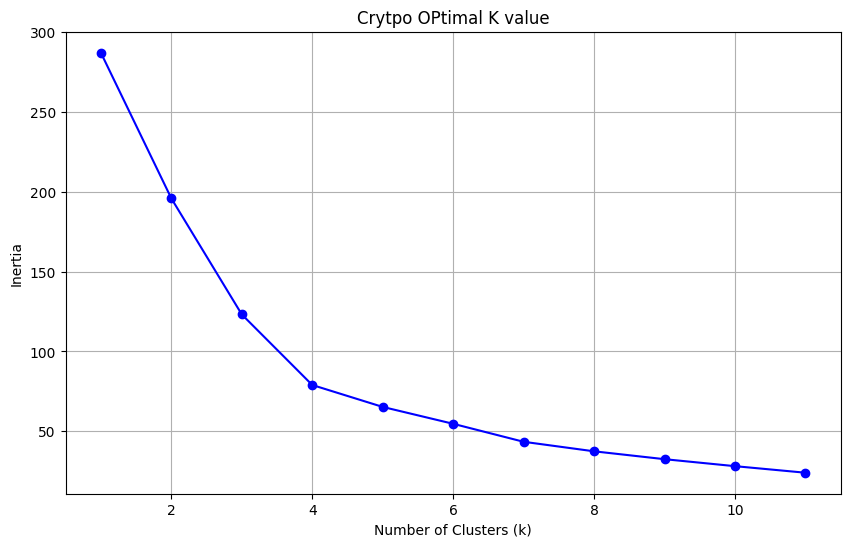

In [14]:
import matplotlib.pyplot as plt
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(df_elbow['crypto_k_values'], df_elbow['crytpo_inertia_values'], marker='o', linestyle='-', color='b')
plt.title('Crytpo OPtimal K value')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** The best value for k would be 4 because the graph shows a line plot decreasing from 1-11 but there is a shift in the rate of decrease at the point 4. This will probably show the best clusters of the data explaining the variance the clearest.


---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [15]:
# Initialize the K-Means model using the best value for k
kmeans_model = KMeans(n_clusters=4, random_state=100)

In [16]:
# Fit the model to the scaled data
kmeans_model.fit(crypto_df_scaled)

C:\Users\Jack.Hayes\.vscode\Anaconda\envs\ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=100)

In [17]:
# Predict the clusters to group the cryptocurrencies using the scaled data
predicted_clusters = kmeans_model.predict(crypto_df_scaled)

# Print the resulting array of cluster values.
print(predicted_clusters)

[3 3 0 0 3 3 3 3 3 0 0 0 0 3 0 3 0 0 3 0 0 3 0 0 0 0 0 0 3 0 0 0 2 3 0 0 1
 0 0 0 0]


In [18]:
# Create a copy of the DataFrame
df_copy_clusters = crypto_df_scaled.copy()

In [19]:
# Add a new column to the DataFrame with the predicted clusters
df_copy_clusters['cluster_label'] = predicted_clusters

# Display sample data
print(df_copy_clusters.head())

              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash                     1.760610   

In [20]:
# Create a scatter plot using hvPlot by setting 
crypto_scatter_plot = df_copy_clusters.hvplot.scatter(
x= "price_change_percentage_24h",# `x="price_change_percentage_24h"`
y="price_change_percentage_7d",
c="cluster_label",
cmap="viridis",
colorbar=True,# Color the graph points with the labels found using K-Means
hover_cols=["coin_id"],# add the crypto name in the `hover_cols` parameter to identify 
title="Crypto Clusters",
width=800,
height=500,
)

crypto_scatter_plot


:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,cluster_label,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [21]:
# Create a PCA model instance and set `n_components=3`.
pca_model = PCA(n_components=3)

In [22]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
pca_results = pca_model.fit_transform(df_copy_clusters)
df_pca = pd.DataFrame(data=pca_results, columns=['PC1', 'PC2', 'PC3'], index=crypto_df_scaled.index)
# View the first five rows of the DataFrame. 
print(df_pca.head())

                   PC1       PC2       PC3
coin_id                                   
bitcoin       2.034093 -0.641571 -0.357629
ethereum      1.994502 -0.490549 -0.912250
tether       -1.068544 -0.417205  0.596311
ripple       -1.040919 -0.455234  0.467801
bitcoin-cash  3.302764 -1.242458 -0.217276


In [23]:
# Retrieve the explained variance to determine how much information 
explained_variance = pca_model.explained_variance_ratio_
# can be attributed to each principal component.
print("Explained Variance:")
for i, variance in enumerate(explained_variance, 1):
    print(f"PC{i}: {variance:.4f}")

Explained Variance:
PC1: 0.3694
PC2: 0.2917
PC3: 0.2289


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** The total explained variance of the three principal components is 0.89 or 89%. This is a the sum of the three PCA variances combined.

In [25]:
# Create a new DataFrame with the PCA data.
df_pca2 = df_pca.copy()

# Display sample data
print(df_pca2.head())


                   PC1       PC2       PC3
coin_id                                   
bitcoin       2.034093 -0.641571 -0.357629
ethereum      1.994502 -0.490549 -0.912250
tether       -1.068544 -0.417205  0.596311
ripple       -1.040919 -0.455234  0.467801
bitcoin-cash  3.302764 -1.242458 -0.217276


---

### Find the Best Value for k Using the PCA Data

In [26]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1,12))
print(k_values)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [27]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans_model = KMeans(n_clusters=k, random_state=42)
# 2. Fit the model to the data using `df_market_data_pca`
    kmeans_model.fit(df_pca2)
# 3. Append the model.inertia_ to the inertia list
    inertia_values.append(kmeans_model.inertia_)
print(inertia_values)

[325.73473957856277, 201.2876224565441, 111.73680938677683, 40.19728442405935, 29.514810382341906, 20.988916219540833, 15.365024356826597, 12.036177527434425, 9.573032652919263, 8.014679190959509, 6.726133923928876]


C:\Users\Jack.Hayes\.vscode\Anaconda\envs\ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Jack.Hayes\.vscode\Anaconda\envs\ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Jack.Hayes\.vscode\Anaconda\envs\ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Jack.Hayes\.vscode\Anaconda\envs\ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The 

In [28]:
# Create a dictionary with the data to plot the Elbow curve
elbow_pca_data = {
    'k_values': k_values,
    'inertia_values': inertia_values
}
# Create a DataFrame with the data to plot the Elbow curve
df_elbow_curve = pd.DataFrame(elbow_pca_data)

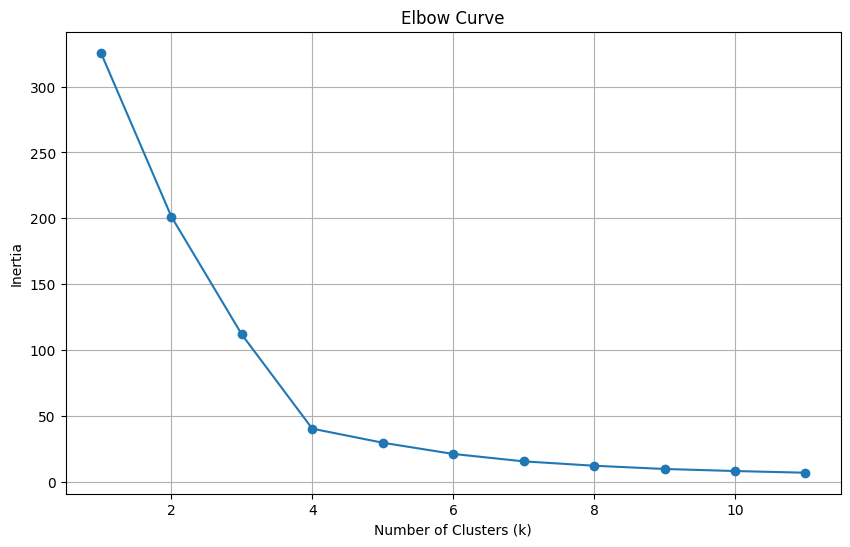

In [29]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(df_elbow_curve['k_values'], df_elbow_curve['inertia_values'], marker='o')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** The best value for 'k' when using the PCA data looks to be 4 when there is a change decrease in rate of inertia.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** This looks to be the same as the original data which was 4 as well.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [46]:
# Initialize the K-Means model using the best value for k
kmeans_pca_model = KMeans(n_clusters=4, random_state=42)

In [47]:
# Fit the K-Means model using the PCA data
kmeans_model.fit(df_pca2)

C:\Users\Jack.Hayes\.vscode\Anaconda\envs\ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=11, random_state=42)

In [48]:
# Predict the clusters to group the cryptocurrencies using the PCA data
clusters_pca = kmeans_model.predict(df_pca2)
# Print the resulting array of cluster values.
print(clusters_pca)

[ 1  8  5  5  6  1  8  8  1  5  0  5  5  6  5  8  0  5  8  5  0  1  0  5
  2  5  5 10  8  9  5  5  4  1  7  2  3 10  5  5  5]


In [49]:
# Create a copy of the DataFrame with the PCA data


# Add a new column to the DataFrame with the predicted clusters
df_pca2["predicted_cluster"] = clusters_pca

# Display sample data
print(df_pca2.head())

                   PC1       PC2       PC3  predicted_cluster
coin_id                                                      
bitcoin       2.034093 -0.641571 -0.357629                  1
ethereum      1.994502 -0.490549 -0.912250                  8
tether       -1.068544 -0.417205  0.596311                  5
ripple       -1.040919 -0.455234  0.467801                  5
bitcoin-cash  3.302764 -1.242458 -0.217276                  6


In [45]:
# Create a scatter plot using hvPlot by setting 
pca_scatter_plot = df_pca2.hvplot.scatter(
x = 'PC1',
y = 'PC2',   # `x="PC1"` and `y="PC2"`. 
c= 'predicted_cluster',
cmap='viridis',# Color the graph points with the labels found using K-Means and 
title='PCA Scatter Plot',
hover_cols=['coin_id']# add the crypto name in the `hover_cols` parameter to identify 
)                     # the cryptocurrency represented by each data point.
pca_scatter_plot

:Scatter   [PC1]   (PC2,predicted_cluster,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [54]:
# Composite plot to contrast the Elbow curves
elbow_curve_data = pd.DataFrame({
    'k_values': k_values,
    'inertia_values_raw':crytpo_inertia_values,
    'inertia_values_optimized' : inertia_values
})

In [55]:
elbow_curve_raw = elbow_curve_data.hvplot.line(x='k_values', y='inertia_values_raw', label='Without Optimization')

In [56]:
elbow_curve_optimized = elbow_curve_data.hvplot.line(x='k_values', y='inertia_values_optimized', label='With Optimization')

In [57]:
composite_plot = elbow_curve_raw * elbow_curve_optimized

In [58]:
composite_plot.opts(
    title='Comparison of Elbow Curves',
    xlabel='Number of Clusters (k)',
    ylabel='Inertia',
    legend_position='top_left'
)
    

:Overlay
   .Curve.Without_Optimization :Curve   [k_values]   (inertia_values_raw)
   .Curve.With_Optimization    :Curve   [k_values]   (inertia_values_optimized)

In [65]:
import matplotlib.pyplot as plt

In [67]:
print(df_pca.columns)

Index(['PC1', 'PC2', 'PC3'], dtype='object')


In [66]:
plt.figure(figsize=(10, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['cluster_label'], cmap='Set1', label='Without Optimization')
plt.title('Clusters without Optimization')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Cluster Label')
plt.legend()
plt.show()

KeyError: 'cluster_label'

<Figure size 1000x600 with 0 Axes>

In [60]:
plt.figure(figsize=(10, 6))
plt.scatter(df_pca2['PC1'], df_pca2['PC2'], c=df_pca2['cluster_label'], cmap='Set1', label='With Optimization')
plt.title('Clusters with Optimization')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='Cluster Label')
plt.legend()
plt.show()

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** 